# Atividade 3

Desenvolvedores: Cecília e Bruno

Nesta atividade vocês precisarão implementar o modelo gaussiano no Python. Vocês devem realizar os seguintes tópicos:\
-Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.\
-Implementar a função de estimativa de coeficiente de dispersão (sigmaYZ) para todas as classes de estabilidade.\
-Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs (quem fizer o método de Briggs ganha um ponto a mais). Deve ser considerado o efeito Tip-Downwash\
-Implementar a função do modelo gaussiano\
-Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.\
-Faça figuras e discuta os resultados.


In [11]:
import numpy as np
import pandas as pd

# Definindo a quantidade de valores a serem gerados
quantidade_valores = 20

# Criando uma série de datas para 5 dias no verão e 5 dias no inverno
datas_verao = pd.date_range(start='2023-12-06', periods=10, freq='D')  
datas_inverno = pd.date_range(start='2023-06-21', periods=10, freq='D')  
datas = datas_verao.append(datas_inverno)

# Gerando uma série de cobertura de nuvens (valores entre 0 e 8)
cobertura_nuvens = np.random.randint(0, 9, size=quantidade_valores)

# Gerando uma série de radiação solar usando o método de Monte Carlo com funções seno e cosseno
# Considerando valores entre 0 e 1000 W/m^2
fatores_aleatorios = np.random.rand(quantidade_valores)  # fatores aleatórios entre 0 e 1
radiacao_solar = 500 + 500 * np.sin(2 * np.pi * fatores_aleatorios) * np.cos(2 * np.pi * fatores_aleatorios)

# Gerando uma série de velocidade do vento usando o método de Monte Carlo com funções seno e cosseno
# Considerando valores entre 0 e 15 m/s
velocidade_vento = 7.5 + 7.5 * np.sin(2 * np.pi * fatores_aleatorios) * np.cos(2 * np.pi * fatores_aleatorios)

# Criando um DataFrame para organizar os dados
dados = pd.DataFrame({
    'Data': datas,
    'Cobertura de Nuvens': cobertura_nuvens,
    'Radiação Solar (W/m^2)': radiacao_solar,
    'Velocidade do Vento (m/s)': velocidade_vento
})

# Exibindo o DataFrame
print(dados)

         Data  Cobertura de Nuvens  Radiação Solar (W/m^2)  \
0  2023-12-06                    0              730.340995   
1  2023-12-07                    2              712.442171   
2  2023-12-08                    2              401.308249   
3  2023-12-09                    7              497.365558   
4  2023-12-10                    5              674.785482   
5  2023-12-11                    7              371.604080   
6  2023-12-12                    1              333.421987   
7  2023-12-13                    6              743.918954   
8  2023-12-14                    7              694.092741   
9  2023-12-15                    2              474.230257   
10 2023-06-21                    0              636.085557   
11 2023-06-22                    5              310.796940   
12 2023-06-23                    0              357.926240   
13 2023-06-24                    0              307.103215   
14 2023-06-25                    6              253.472877   
15 2023-

In [12]:
import numpy as np
import pandas as pd

# Função para classificar a estabilidade atmosférica de acordo com o esquema de Pasquil
def classificar_estabilidade(linha):
    velocidade_vento = linha['Velocidade do Vento (m/s)']
    cobertura_nuvens = linha['Cobertura de Nuvens']
    radiacao_solar = linha['Radiação Solar (W/m^2)']
    
    # Classificação baseada na cobertura de nuvens e na velocidade do vento
    if cobertura_nuvens <= 3:  # Céu claro ou poucas nuvens
        if velocidade_vento < 2:
            if radiacao_solar > 600:
                return 'A'  # Muito instável
            elif radiacao_solar > 300:
                return 'B'  # Moderadamente instável
            else:
                return 'C'  # Pouco instável
        elif velocidade_vento < 3:
            if radiacao_solar > 600:
                return 'A'  # Muito instável
            elif radiacao_solar > 300:
                return 'B'  # Moderadamente instável
            else:
                return 'C'  # Pouco instável
        elif velocidade_vento < 5:
            if radiacao_solar > 600:
                return 'B'  # Moderadamente instável
            elif radiacao_solar > 300:
                return 'C'  # Pouco instável
            else:
                return 'D'  # Neutro
        else:
            if radiacao_solar > 600:
                return 'C'  # Pouco instável
            elif radiacao_solar > 300:
                return 'D'  # Neutro
            else:
                return 'D'  # Neutro
    elif cobertura_nuvens <= 6:  # Nublado
        if velocidade_vento < 3:
            return 'D'  # Neutro
        elif velocidade_vento < 5:
            return 'D'  # Neutro
        else:
            return 'D'  # Neutro
    else:  # Céu muito nublado
        if velocidade_vento < 2:
            return 'E'  # Pouco estável
        elif velocidade_vento < 3:
            return 'E'  # Pouco estável
        elif velocidade_vento < 5:
            return 'D'  # Neutro
        else:
            return 'D'  # Neutro

# Gerando os dados fictícios
dados = pd.DataFrame({
    'Data': pd.date_range(start='2024-01-01', periods=20, freq='D'),
    'Cobertura de Nuvens': np.random.randint(0, 9, size=20),
    'Radiação Solar (W/m^2)': 500 + 500 * np.sin(2 * np.pi * np.random.rand(20)) * np.cos(2 * np.pi * np.random.rand(20)),
    'Velocidade do Vento (m/s)': 7.5 + 7.5 * np.sin(2 * np.pi * np.random.rand(20)) * np.cos(2 * np.pi * np.random.rand(20))
})

# Aplicando a função de classificação de estabilidade a cada linha do DataFrame
dados['Classe de Estabilidade'] = dados.apply(classificar_estabilidade, axis=1)

# Exibindo o DataFrame resultante com a nova coluna de classe de estabilidade
print(dados)

         Data  Cobertura de Nuvens  Radiação Solar (W/m^2)  \
0  2024-01-01                    5              479.377034   
1  2024-01-02                    3              283.864334   
2  2024-01-03                    4              362.094605   
3  2024-01-04                    8               30.267768   
4  2024-01-05                    6              456.624601   
5  2024-01-06                    1              385.899114   
6  2024-01-07                    0              575.000551   
7  2024-01-08                    5              731.947079   
8  2024-01-09                    5              755.081807   
9  2024-01-10                    1              496.444865   
10 2024-01-11                    7              741.469013   
11 2024-01-12                    7              459.039250   
12 2024-01-13                    7              406.048566   
13 2024-01-14                    4              344.233737   
14 2024-01-15                    5              677.522047   
15 2024-

In [13]:
import numpy as np

# Função para calcular sigmaY e sigmaZ com base na distância, classe de estabilidade e tipo de ambiente
def calcular_dispersao(distancia, tipo_estabilidade, tipo_ambiente):
    # Verificação do tipo de ambiente
    if tipo_ambiente == 'rural':
        # Cálculos para ambiente rural
        if tipo_estabilidade == 'A':
            dispersao_y = 0.22 * distancia * (1 + 0.0001 * distancia) ** (-0.5)
            dispersao_z = 0.20 * distancia
        elif tipo_estabilidade == 'B':
            dispersao_y = 0.16 * distancia * (1 + 0.0001 * distancia) ** (-0.5)
            dispersao_z = 0.12 * distancia
        elif tipo_estabilidade == 'C':
            dispersao_y = 0.11 * distancia * (1 + 0.0001 * distancia) ** (-0.5)
            dispersao_z = 0.08 * distancia * (1 + 0.0002 * distancia) ** (-0.5)
        elif tipo_estabilidade == 'D':
            dispersao_y = 0.08 * distancia * (1 + 0.0001 * distancia) ** (-0.5)
            dispersao_z = 0.06 * distancia * (1 + 0.0003 * distancia) ** (-0.5)
        elif tipo_estabilidade == 'E':
            dispersao_y = 0.06 * distancia * (1 + 0.0001 * distancia) ** (-0.5)
            dispersao_z = 0.03 * distancia * (1 + 0.0003 * distancia) ** (-1)
        elif tipo_estabilidade == 'F':
            dispersao_y = 0.04 * distancia * (1 + 0.0001 * distancia) ** (-0.5)
            dispersao_z = 0.016 * distancia * (1 + 0.0003 * distancia) ** (-1)
        else:
            raise ValueError('Classe de estabilidade inválida')
    elif tipo_ambiente == 'urbano':
        # Cálculos para ambiente urbano
        if tipo_estabilidade in ['A', 'B']:
            dispersao_y = 0.32 * distancia * (1 + 0.0004 * distancia) ** (-0.5)
            dispersao_z = 0.24 * distancia * (1 + 0.001 * distancia) ** 0.5
        elif tipo_estabilidade == 'C':
            dispersao_y = 0.22 * distancia * (1 + 0.0004 * distancia) ** (-0.5)
            dispersao_z = 0.20 * distancia
        elif tipo_estabilidade == 'D':
            dispersao_y = 0.16 * distancia * (1 + 0.0004 * distancia) ** (-0.5)
            dispersao_z = 0.14 * distancia * (1 + 0.0003 * distancia) ** (-0.5)
        elif tipo_estabilidade in ['E', 'F']:
            dispersao_y = 0.11 * distancia * (1 + 0.0004 * distancia) ** (-0.5)
            dispersao_z = 0.08 * distancia * (1 + 0.0015 * distancia) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade inválida')
    else:
        raise ValueError('Tipo de ambiente deve ser "urbano" ou "rural"')

    # Adicionando declarações de impressão para depuração
    print(f"Classe de Estabilidade: {tipo_estabilidade}, Ambiente: {tipo_ambiente}, Distância: {distancia}")
    print(f"Dispersão Horizontal (sigmaY): {dispersao_y}, Dispersão Vertical (sigmaZ): {dispersao_z}")

    return dispersao_y, dispersao_z

# Exemplo de uso da função
distancia = 5000
tipo_estabilidade = 'A'
tipo_ambiente = 'urbano'
dispersao_y, dispersao_z = calcular_dispersao(distancia, tipo_estabilidade, tipo_ambiente)
print(f"Resultado: Dispersão Horizontal (sigmaY) = {dispersao_y}, Dispersão Vertical (sigmaZ) = {dispersao_z}")

Classe de Estabilidade: A, Ambiente: urbano, Distância: 5000
Dispersão Horizontal (sigmaY): 923.7604307034012, Dispersão Vertical (sigmaZ): 2939.3876913398135
Resultado: Dispersão Horizontal (sigmaY) = 923.7604307034012, Dispersão Vertical (sigmaZ) = 2939.3876913398135


In [15]:
import pandas as pd
import numpy as np

# Função para calcular a elevação da pluma de acordo com Briggs, considerando a classe de estabilidade e o efeito Tip-Downwash
def elevacao_pluma(velocidade_vento, altura_chamine, velocidade_saida, diametro_chamine, diferenca_temperatura, temperatura_ambiente, classe_estabilidade):
  
    gravidade = 9.81  # aceleração da gravidade (m/s^2)
    fluxo_flutuabilidade = (gravidade * diametro_chamine**2 * velocidade_saida * diferenca_temperatura) / (4 * temperatura_ambiente)  # fluxo de flutuabilidade
    
    # Calculando a elevação da pluma de acordo com a classe de estabilidade
    if classe_estabilidade == 'C':
        altura_pluma = (2.6 * fluxo_flutuabilidade**0.333 * altura_chamine**0.667) / (velocidade_vento + 0.5 * velocidade_saida)
    elif classe_estabilidade == 'D':
        altura_pluma = (1.6 * fluxo_flutuabilidade**0.333 * altura_chamine**0.667) / (velocidade_vento + 0.5 * velocidade_saida)
    else:
        raise ValueError('Classe de estabilidade inválida. Use "C" ou "D".')
    
    # Considerando o efeito Tip-Downwash
    if velocidade_vento > 1.5 * velocidade_saida:
        altura_pluma *= 0.6  # Reduzindo a elevação da pluma em 40%

    return altura_pluma

# Gerando dados fictícios para exemplo
dados = pd.DataFrame({
    'Velocidade do Vento (m/s)': np.random.uniform(1, 10, 10),
    'Classe de Estabilidade': ['C', 'D', 'C', 'D', 'C', 'D', 'C', 'D', 'C', 'D']
})

# Exemplo de parâmetros variáveis para a chaminé e as condições atmosféricas
altura_chamine = 50  # m
velocidade_saida = 12  # m/s
diametro_chamine = 4  # m
diferenca_temperatura = 100  # K
temperatura_ambiente = 300  # K

# Calculando a elevação da pluma para cada linha do DataFrame usando os parâmetros variáveis
dados['Elevação da Pluma (m)'] = dados.apply(
    lambda linha: elevacao_pluma(
        linha['Velocidade do Vento (m/s)'],
        altura_chamine,
        velocidade_saida,
        diametro_chamine,
        diferenca_temperatura,
        temperatura_ambiente,
        linha['Classe de Estabilidade']
    ), axis=1
)

# Exibindo os dados resultantes
print(dados)

# A condição para reduzir a elevação da pluma em 40% quando a velocidade do vento é significativamente maior (1.5 vezes maior) do que a velocidade de saída dos gases, o que considera o efeito Tip-Downwash. Esta redução é aplicada diretamente ao valor calculado de altura_pluma.

   Velocidade do Vento (m/s) Classe de Estabilidade  Elevação da Pluma (m)
0                   5.134107                      C              17.089474
1                   8.101985                      D               8.303295
2                   3.961825                      C              19.100519
3                   9.274875                      D               7.665722
4                   4.605407                      C              17.941416
5                   1.517221                      D              15.576627
6                   2.535474                      C              22.292379
7                   1.267283                      D              16.112341
8                   7.192698                      C              14.422829
9                   3.888588                      D              11.841219


In [16]:
# Simular para a menor elevação da pluma
menor_elevacao_pluma = dados['Elevação da Pluma (m)'].min()
print(f"Menor valor de elevação da pluma: {menor_elevacao_pluma} m")

Menor valor de elevação da pluma: 7.665721848810772 m


In [24]:
import numpy as np

def modelo_gaussiano(qs, dispersao_y, dispersao_z, velocidade_vento, y, z, altura):
   
    termo1 = qs / (2 * np.pi * dispersao_y * dispersao_z * velocidade_vento)
    termo2 = np.exp((-y**2) / (2 * dispersao_y**2))
    termo3 = np.exp((-(z - altura)**2) / (2 * dispersao_z**2)) + np.exp((-(z + altura)**2) / (2 * dispersao_z**2))
    conc = termo1 * termo2 * termo3
    conc = conc*10**6
    return conc

# Parâmetros fixos e adicionais
qs = 100  # g/s
u = 5  # m/s (velocidade do vento)
y = 0  # Estimativa na direção do vento
z = 1.5  # Altura do nariz
H = 50  # Altura da camada de dispersão

# Chamando a função do modelo gaussiano
conc = modelo_gaussiano(qs, dispersao_y, dispersao_z, u, y, z, H)

# Exibindo os parâmetros e o resultado
print(f'qs: {qs} g/s')
print(f'dispersao_y: {dispersao_y} m')
print(f'dispersao_z: {dispersao_z} m')
print(f'u: {u} m/s')
print(f'y: {y} m')
print(f'z: {z} m')
print(f'H: {H} m')

print(f"\nA concentração estimada é = {conc} g/m³")

qs: 100 g/s
dispersao_y: 923.7604307034012 m
dispersao_z: 2939.3876913398135 m
u: 5 m/s
y: 0 m
z: 1.5 m
H: 50 m

A concentração estimada é = 2.344234256001293 g/m³


In [26]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x,classe,urbOrRural):
    if urbOrRural=='urbano':
        if (classe=='A') or (classe=='B'):
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        else:
            print('Classe de estabilidade errada')
    if urbOrRural=='rural':
        if (classe=='A') :
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.20*x
        else:
            print('Classe de estabilidade errada. Fique ligado')
    return sigmaY,sigmaZ


deltaH = 7.665721848810772
A pluma subiu


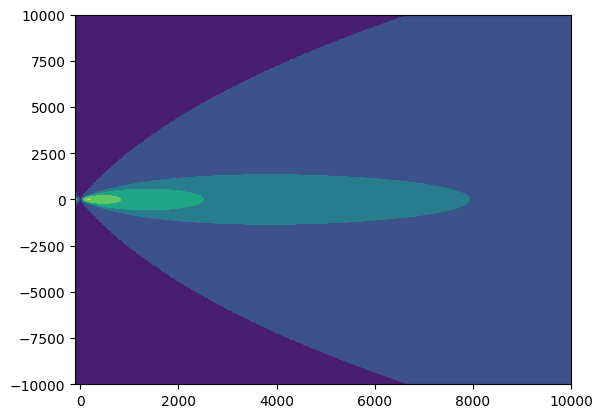

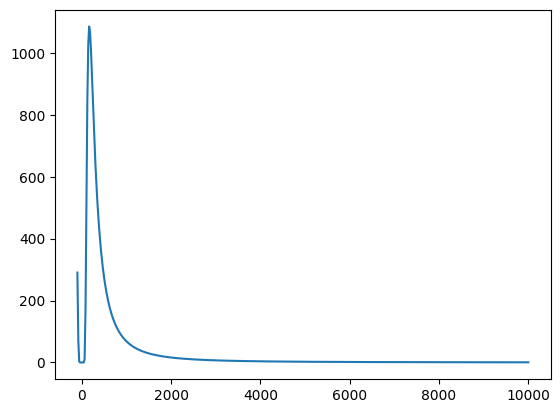

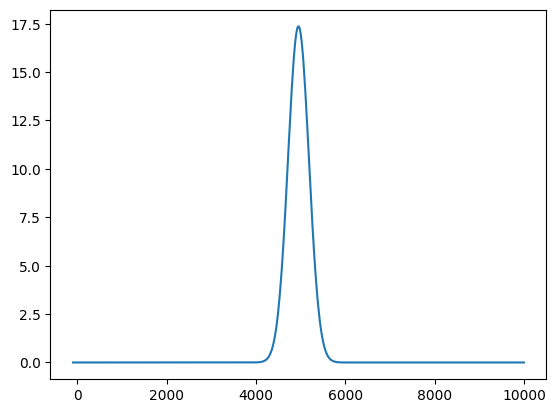

In [27]:
# Criando domínio de modelagem 
x = np.linspace(-100,10000,500)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)

# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 50 # m altura geométrica da chaminé
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = dados['Elevação da Pluma (m)'].min()
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modelo_gaussiano(qs,sigmaY,sigmaZ,u,yy,z,hef)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])

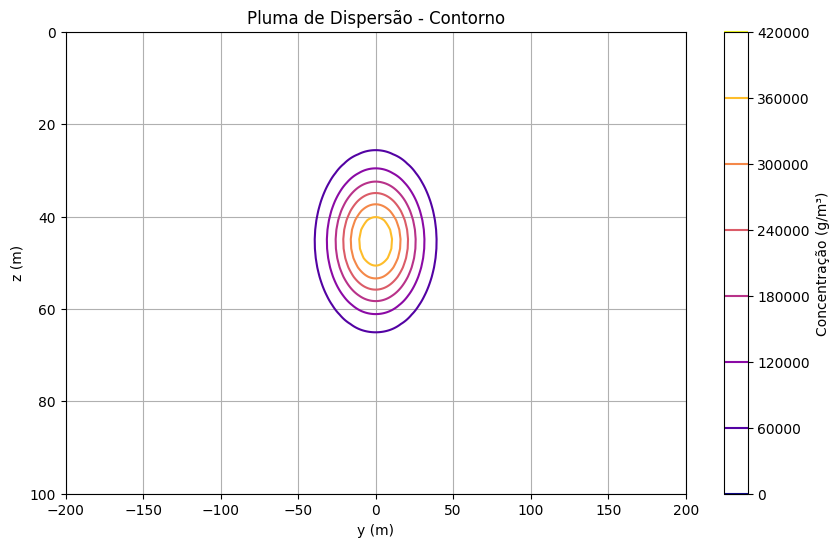

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Definição dos parâmetros
H = dados['Elevação da Pluma (m)'].min() + 45  # Menor elevação da pluma + altura da chaminé
qs = 2603.43  # g/s ( taxa de emissão de PM-10)
u = 5  # m/s (velocidade do vento)
y = 0  # Posição na direção do vento
z = 1.5  # Altura do nariz

# Dados gerados
y = np.linspace(-200, 200, 1000)  # Coordenada y (m)
z = np.linspace(0, 100, 50)  # Coordenada z (m)

# Calculando a concentração para cada par de coordenadas (y, z)
Y, Z = np.meshgrid(y, z)
sigmaY = 20  # Valor de exemplo para sigmaY
sigmaZ = 10  # Valor de exemplo para sigmaZ
conc = modelo_gaussiano(qs, sigmaY, sigmaZ, u, Y, Z, H)

# Plotando o gráfico de contorno da pluma de dispersão
plt.figure(figsize=(10, 6))
contours = plt.contour(Y, Z, conc, cmap='plasma')
plt.colorbar(contours, label='Concentração (g/m³)')
plt.title('Pluma de Dispersão - Contorno')
plt.xlabel('y (m)')
plt.ylabel('z (m)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


In [34]:
import numpy as np

# Função do modelo gaussiano (substituir pelo seu código real)
def modeloGaussiano(qs, dispersao_y, dispersao_z, u, y, z, H):
    termo1 = qs / (2 * np.pi * dispersao_y * dispersao_z * u)
    termo2 = np.exp((-y**2) / (2 * dispersao_y**2))
    termo3 = np.exp((-(z - H)**2) / (2 * dispersao_z**2)) + np.exp((-(z + H)**2) / (2 * dispersao_z**2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10**6  # Convertendo para µg/m³
    return conc

# Função para calcular dispersao_y e dispersao_z (substituir pelo seu código real)
def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A':
            dispersao_y = 0.32 * x * (1 + 0.0004 * x)**(-0.5)
            dispersao_z = 0.24 * x * (1 + 0.001 * x)**(0.5)
        elif classe == 'B':
            dispersao_y = 0.32 * x * (1 + 0.0004 * x)**(-0.5)
            dispersao_z = 0.24 * x * (1 + 0.001 * x)**(0.5)
        elif classe == 'C':
            dispersao_y = 0.22 * x * (1 + 0.0004 * x)**(-0.5)
            dispersao_z = 0.20 * x
        elif classe == 'D':
            dispersao_y = 0.16 * x * (1 + 0.0003 * x)**(-0.5)
            dispersao_z = 0.14 * x
        elif classe == 'E':
            dispersao_y = 0.11 * x * (1 + 0.0002 * x)**(-0.5)
            dispersao_z = 0.08 * x * (1 + 0.001 * x)**(0.5)
        elif classe == 'F':
            dispersao_y = 0.11 * x * (1 + 0.0002 * x)**(-0.5)
            dispersao_z = 0.08 * x * (1 + 0.001 * x)**(0.5)
        else:
            raise ValueError('Classe de estabilidade não suportada para ambiente urbano.')
    elif urbOrRural == 'rural':
        if classe == 'A':
            dispersao_y = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            dispersao_z = 0.20 * x
        elif classe == 'B':
            dispersao_y = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            dispersao_z = 0.20 * x
        elif classe == 'C':
            dispersao_y = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            dispersao_z = 0.20 * x
        elif classe == 'D':
            dispersao_y = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            dispersao_z = 0.20 * x
        elif classe == 'E':
            dispersao_y = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            dispersao_z = 0.20 * x
        elif classe == 'F':
            dispersao_y = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            dispersao_z = 0.20 * x
        else:
            raise ValueError('Classe de estabilidade não suportada para ambiente rural.')
    else:
        raise ValueError('Tipo de ambiente não suportado. Use "urbano" ou "rural".')
    return dispersao_y, dispersao_z

# Definir os parâmetros iniciais
taxa_emissao = 2603.43 # g/s (conforme estimado na primeira atividade)
velocidades_vento = np.arange(1, 11, 1) # m/s
alturas_chamine = np.arange(10, 1001, 10) # m
classes_estabilidade = ["A", "B", "C", "D", "E", "F"]

# Padrão de qualidade do ar (Resolução CONAMA 491)
padrao_qualidade = 40 # µg/m³

# Dados de elevação da pluma (substitua pelo seu dataset real)
dados = {'Elevação da Pluma (m)': np.random.uniform(low=0, high=100, size=100)}  # Dados de exemplo

# Encontrar a altura de chaminé necessária para atender aos padrões
for v in velocidades_vento:
    for c in classes_estabilidade:
        dispersao_y, dispersao_z = sigmaXY(5000, c, "urbano")
        for h in alturas_chamine:
            deltaH = dados['Elevação da Pluma (m)'].min()
            if vs > 1.5 * v:
                hef = h + deltaH
            else:
                hef = h + deltaH
            conc = modeloGaussiano(taxa_emissao, dispersao_y, dispersao_z, v, 0, 1.5, hef)
            if conc <= padrao_qualidade:
                print(f"\nPara velocidade do vento = {v} m/s, classe de estabilidade = {c} e altura de chaminé = {h} m, a concentração atende ao padrão de qualidade.\n")
                break
            elif h == alturas_chamine[-1]:
                print(f"\nNão foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = {v} m/s e classe de estabilidade = {c}.\n")




Não foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = 1 m/s e classe de estabilidade = A.


Não foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = 1 m/s e classe de estabilidade = B.


Não foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = 1 m/s e classe de estabilidade = C.


Não foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = 1 m/s e classe de estabilidade = D.


Não foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = 1 m/s e classe de estabilidade = E.


Não foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = 1 m/s e classe de estabilidade = F.


Não foi possível encontrar uma altura de chaminé que atenda ao padrão de qualidade para velocidade do vento = 2